In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import product
import scipy.stats as ss
from dython.nominal import associations

# For sheet 1

In [2]:
df = pd.read_excel("Book3.xlsx") 
# importing first page as for the first question

In [9]:
df.head()

,CodMun,State,State_code,Municipality,Estimated_pop_2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Masculine,40.0,White,Specialization,Yes
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Female,33.0,White,complete higher education,Yes
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Masculine,50.0,brown,complete higher education,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Masculine,35.0,brown,complete higher education,Yes
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Female,57.0,White,complete higher education,-


In [4]:
df.columns

Index(['CodMun', 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'mpeg03', 'Mayor Age', 'Mayor Ethnicity',
       'mpeg06 - Education of the mayor', 'Education of mayor',
       'Projects  aimed at Rural Population'],
      dtype='object')

In [7]:
df = df.drop("Education of mayor",axis=1)

In [8]:
#changing the column names
df.columns = ['CodMun', 'State', 'State_code', 'Municipality', 'Estimated_pop_2021',
       'track_pop', 'Region','Gender', 'Mayor_Age', 'Mayor_Ethnicity','Ed_of_Mayor', 
       'Projects_aimed_at_RuralEducation']

In [93]:
# we are changing to numerical data 
replace_dict = {"1 - Up to 5000" : 1, 
                "2 - 5001 to 10000" :2,
                "3 - 10001 to 20000" :3,
                "4 - 20001 to 50000" : 4,
                "5 - 50001 to 100000" : 5,
                "6 - 100001 to 500000" : 6,
                "7 - Greater than 500000" : 7,
                "1 - North" : 1,
                "2 - Northeast" :2,
                "3 - Southeast" : 3,
                "4 - South" : 4,
                "5 - Midwest" : 5}

In [11]:
df_new = df.replace(replace_dict)
# replacing the basic columns values to numbers 

In [19]:
df_new.head()

,CodMun,State,State_code,Municipality,Estimated_pop_2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,40.0,1.0,9.0,1
1,1100023,RO,11,Ariquemes,111148,6,1,2.0,33.0,1.0,6.0,1
2,1100031,RO,11,Cabixi,5067,2,1,1.0,50.0,2.0,6.0,1
3,1100049,RO,11,Cacoal,86416,5,1,1.0,35.0,2.0,6.0,1
4,1100056,RO,11,Cerejeiras,16088,3,1,2.0,57.0,1.0,6.0,99


In [13]:
df_new["Ed_of_Mayor"].value_counts()

complete higher education                      2356
High school (2nd degree) complete              1318
Specialization                                  694
incomplete higher education                     400
Elementary education (1st grade) incomplete     263
Complete Elementary School (1st Degree)         231
Incomplete high school (2nd degree)             132
Master's degree                                 108
Doctorate degree                                 66
Name: Ed_of_Mayor, dtype: int64

In [29]:
replace_df = {"Elementary education (1st grade) incomplete" : 1,
              "Complete Elementary School (1st Degree)": 2,
              "Incomplete high school (2nd degree)" : 3,
              "High school (2nd degree) complete" : 4,
              "incomplete higher education" : 5,
              "complete higher education" : 6,
              "Master's degree" : 7,
              "Doctorate degree" : 8,
              "Specialization" : 9, 
              "Masculine" : 1,
              "Female" : 2,
              "White" : 1, "brown" : 2,"black" : 3,"Yellow" : 4, "Indigenous" : 5,"Refusal" : None,
              "Yes" : 1,"No" : 2,"-" : 99,"Not" : 2}
# we are not giving 0 due to correlation or for future methods 

In [30]:
df_new = df_new.replace(replace_df)

In [492]:
new_df = df_new[['track_pop','Region','Gender', 'Mayor_Age', 'Mayor_Ethnicity','Ed_of_Mayor', 
       'Projects_aimed_at_RuralEducation']]
# we are taking the data without common data to change into binary

In [493]:
new_df.head()

,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,4,1,1.0,40.0,1.0,9.0,1.0
1,6,1,2.0,33.0,1.0,6.0,1.0
2,2,1,1.0,50.0,2.0,6.0,1.0
3,5,1,1.0,35.0,2.0,6.0,1.0
4,3,1,2.0,57.0,1.0,6.0,99.0


In [494]:
new_df[new_df.isnull().any(axis=1)]
# we are getting which rows have null values

,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
201,4,1,1.0,NaN,2.0,6.0,1.0
247,4,1,NaN,NaN,NaN,NaN,NaN
423,1,1,1.0,NaN,1.0,4.0,1.0
1914,2,2,1.0,NaN,2.0,6.0,1.0
1951,4,2,1.0,NaN,1.0,6.0,1.0
1984,3,2,2.0,NaN,1.0,4.0,2.0
2000,5,2,1.0,NaN,2.0,9.0,1.0
2183,4,2,1.0,NaN,3.0,4.0,1.0
2191,3,2,1.0,NaN,2.0,4.0,2.0
2667,3,3,1.0,NaN,1.0,6.0,99.0


In [495]:
new_df_1 = new_df.dropna()
# dropping none values 

In [496]:
new_df_2 = new_df_1.astype(int)

In [497]:
new_df_2.dtypes

track_pop                           int64
Region                              int64
Gender                              int64
Mayor_Age                           int64
Mayor_Ethnicity                     int64
Ed_of_Mayor                         int64
Projects_aimed_at_RuralEducation    int64
dtype: object

In [498]:
new_df_bin = new_df_2.applymap(lambda x: bin(x)[2:].zfill(7))

In [499]:
new_df_bin.head()

,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,0000100,0000001,0000001,0101000,0000001,0001001,0000001
1,0000110,0000001,0000010,0100001,0000001,0000110,0000001
2,0000010,0000001,0000001,0110010,0000010,0000110,0000001
3,0000101,0000001,0000001,0100011,0000010,0000110,0000001
4,0000011,0000001,0000010,0111001,0000001,0000110,1100011


In [500]:
len(new_df_bin)

5557

In [501]:
new_df_2["Projects_aimed_at_RuralEducation"].value_counts()

1     2586
99    2337
2      632
3        2
Name: Projects_aimed_at_RuralEducation, dtype: int64

In [502]:
len(new_df_2["Projects_aimed_at_RuralEducation"][new_df_2["Projects_aimed_at_RuralEducation"]== 1 or new_df_2["Projects_aimed_at_RuralEducation"]== 2])/len(new_df_2)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [504]:
done = len(new_df_2["Projects_aimed_at_RuralEducation"][new_df_2["Projects_aimed_at_RuralEducation"]== 1])
not_done = len(new_df_2["Projects_aimed_at_RuralEducation"][new_df_2["Projects_aimed_at_RuralEducation"]== 2])

In [505]:
total = done+not_done
# data removing '-' values from projects column 

In [506]:
done/total 
#total percentage of mayors data(taken the data we have)

0.8036047234307023

In [507]:
not_done/total
#mayors who did not impose any laws on projects for rural education

0.1963952765692977

In [508]:
new_df_bin['combined'] = pd.concat([new_df_bin['Gender'],
                                     new_df_bin['Mayor_Age'],
                                     new_df_bin["Mayor_Ethnicity"],
                                     new_df_bin["Ed_of_Mayor"],
                                     new_df_bin["Projects_aimed_at_RuralEducation"]]
                                    ,axis=1).apply("".join, axis =1)
# combining into one column after converting into binary

In [509]:
new_df_cint = new_df_bin.applymap(lambda x: int(x, 2))
# converting back to integers
new_df_cint.head()

,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation,combined
0,4,1,1,40,1,9,1,352339073
1,6,1,2,33,1,6,1,606094081
2,2,1,1,50,2,6,1,373326593
3,5,1,1,35,2,6,1,341869313
4,3,1,2,57,1,6,99,656425827


In [510]:
survay_data = pd.read_excel("SPSS.xlsx")

In [68]:
#CODE FOR SURVAY DATA MUNCIPALITIES SELECTION`

In [70]:
df1 = pd.read_excel("Book3.xlsx","Q Legislation & planning instr")
df2 = pd.read_excel("Book3.xlsx","Q3 Education")
df3 = pd.read_excel("Book3.xlsx","Culture")
df4 = pd.read_excel("Book3.xlsx","Health")

# For sheet 2 

In [73]:
df1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Mleg16,Mleg161,Mleg20,Mleg201,Mleg21
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Not,-,Not,-,Not
1,1100023,RO,11,Ariquemes,111148,6,1,2,2008,2,2008,2
2,1100031,RO,11,Cabixi,5067,2,1,Not,-,Not,-,Not
3,1100049,RO,11,Cacoal,86416,5,1,1,-,Not,-,1
4,1100056,RO,11,Cerejeiras,16088,3,1,Not,-,2,1987,1


In [72]:
#df1 = df1.replace(replace_dict)
df2 = df2.replace(replace_dict)
df3 = df3.replace(replace_dict)
df4 = df4.replace(replace_dict)

In [85]:
df1_1 = df1.drop(['Mleg161','Mleg201'],axis=1)

In [87]:
df1_1.columns = ['CodMun', 'State', 'State code', 'Municipality', 'Pop', 
               'track_pop','Region', 'Concession_special_use_for_housing', 
               'Legitamate_Posession', 'Environmental_impact']

In [84]:
df1 = pd.read_excel("Book3.xlsx","Q Legislation & planning instr")


In [81]:
replace_dict

{'Yes, as an integral part of the Master Plan': 1,
 'Yes, with specific legislation': 2,
 'Did not inform': 3,
 'Refusal': None,
 '1 - Up to 5000': 1,
 '2 - 5001 to 10000': 2,
 '3 - 10001 to 20000': 3,
 '4 - 20001 to 50000': 4,
 '5 - 50001 to 100000': 5,
 '6 - 100001 to 500000': 6,
 '7 - Greater than 500000': 7,
 '1 - North': 1,
 '2 - Northeast': 2,
 '3 - Southeast': 3,
 '4 - South': 4,
 '5 - Midwest': 5}

In [600]:
replace_df1 = {'Yes, as an integral part of the Master Plan': 2,
               'Yes, with specific legislation': 3,
               'Not': 1,
               'Did not inform': None,
               'Refusal': None}

In [601]:
df1_2 = df1_1.replace(replace_df1)

In [602]:
df1_3 = df1_2.replace(replace_dict)
df1_3.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,1.0,1.0
1,1100023,RO,11,Ariquemes,111148,6,1,3.0,3.0,3.0
2,1100031,RO,11,Cabixi,5067,2,1,1.0,1.0,1.0
3,1100049,RO,11,Cacoal,86416,5,1,2.0,1.0,2.0
4,1100056,RO,11,Cerejeiras,16088,3,1,1.0,3.0,2.0


In [603]:
len(df1_3)

5570

In [604]:
df1_3[df1_3.isnull().any(axis=1)]


,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
191,1502764,SHOVEL,15,Cumaru do Norte,14044,3,1,NaN,NaN,NaN
245,1505700,SHOVEL,15,Ponta de Pedras,32007,4,1,2.0,NaN,NaN
247,1505908,SHOVEL,15,Porto de Moz,42456,4,1,NaN,NaN,NaN
291,1508209,SHOVEL,15,Vigia,54650,5,1,NaN,NaN,NaN
1511,2604205,FOOT,26,Catende,43778,4,2,NaN,NaN,NaN
1571,2609204,FOOT,26,Maraial,11098,3,2,NaN,NaN,NaN
4559,4216602,SC,42,São José,253705,6,4,NaN,NaN,NaN
4793,4309308,LOL,43,Guaíba,98331,5,4,NaN,NaN,NaN
4990,4318200,LOL,43,São Francisco de Paula,21871,4,4,NaN,NaN,NaN


In [605]:
df1_4 = df1_3.dropna()
df1_4.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,1.0,1.0
1,1100023,RO,11,Ariquemes,111148,6,1,3.0,3.0,3.0
2,1100031,RO,11,Cabixi,5067,2,1,1.0,1.0,1.0
3,1100049,RO,11,Cacoal,86416,5,1,2.0,1.0,2.0
4,1100056,RO,11,Cerejeiras,16088,3,1,1.0,3.0,2.0


In [606]:
new_df1 = df1_4[['Concession_special_use_for_housing','Legitamate_Posession', 'Environmental_impact']]

In [607]:
new_df1 = new_df1.astype(int).head()

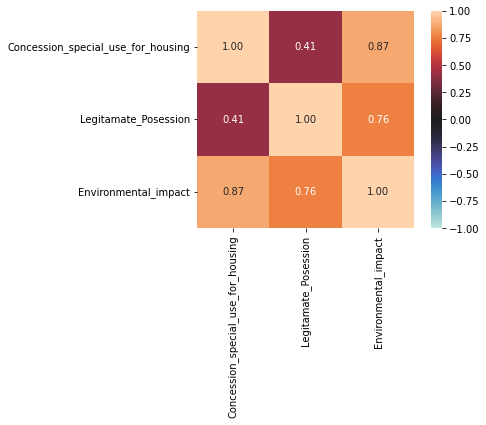

In [608]:
new_corr = associations(new_df1)

In [609]:
new_df1_1 = df1_4[['track_pop','Concession_special_use_for_housing','Legitamate_Posession', 'Environmental_impact']]
# we are taking track_pop because it is not huge numbers to not to effect correlation matrix 
new_df1_1.head()

,track_pop,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,4,1.0,1.0,1.0
1,6,3.0,3.0,3.0
2,2,1.0,1.0,1.0
3,5,2.0,1.0,2.0
4,3,1.0,3.0,2.0


In [610]:
new_df1_1 = new_df1_1.astype(int).head()

In [611]:
new_df1_1.head()

,track_pop,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,4,1,1,1
1,6,3,3,3
2,2,1,1,1
3,5,2,1,2
4,3,1,3,2


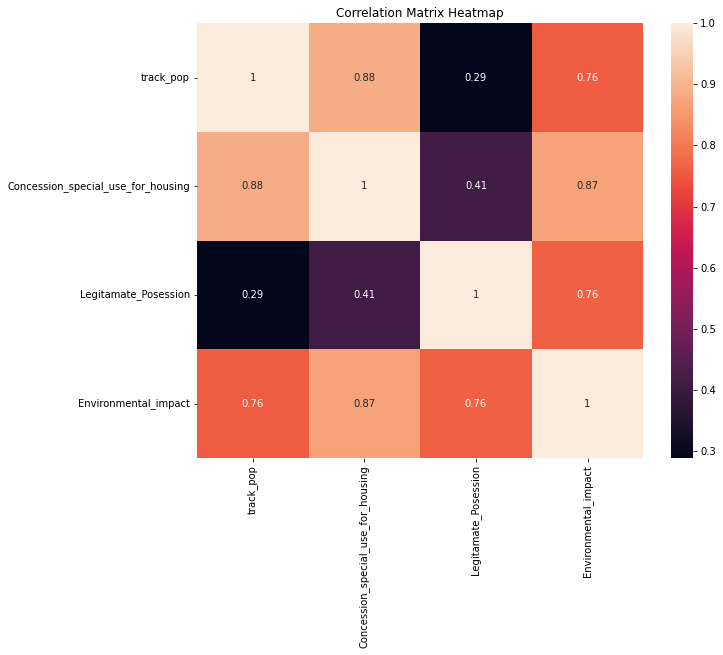

In [612]:


# Assuming you have a DataFrame named 'df' with numerical columns
correlation_matrix1 = new_df1_1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


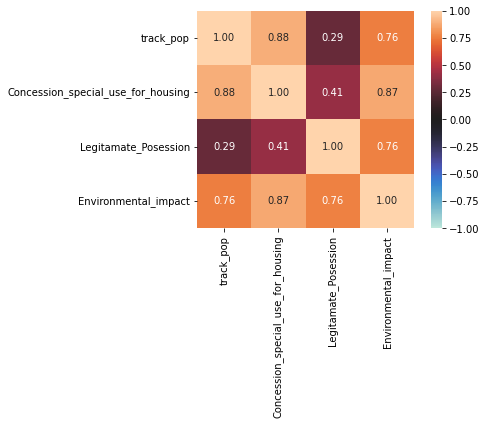

In [613]:
new_corr1 = associations(new_df1_1)
#int values are used because of categorical data 

In [614]:
df1["track_pop"].value_counts()

3 - 10001 to 20000         1319
1 - Up to 5000             1250
2 - 5001 to 10000          1201
4 - 20001 to 50000         1120
5 - 50001 to 100000         354
6 - 100001 to 500000        277
7 - Greater than 500000      49
Name: track_pop, dtype: int64

In [615]:
df1["Region"].value_counts()

2 - Northeast    1794
3 - Southeast    1668
4 - South        1191
5 - Midwest       467
1 - North         450
Name: Region, dtype: int64

# For Sheet 3 education 

In [147]:
df2 = pd.read_excel("Book3.xlsx","Q3 Education")

In [148]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,Not,Not,Not


In [149]:
df2_1= df2.replace(replace_dict)
df2_1.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6,1,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2,1,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5,1,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3,1,Not,Not,Not,Not


In [151]:
df2_col = ['CodMun', 'State', 'State code', 'Municipality', 'Pop', 
               'track_pop','Region',"ISDRS" , "SCI" , "DSDP", "PCR"]
# ISDRS = Inclusion of students with disabilities in regular schools,
# SCI = School-community integration (opening of schools to the community, use of collective
#      spaces for routine school actions, among other actions)
# DSDP = Decrease in school dropout and dropout (active search for students)
# PCR = Public call for registration

In [156]:
df2_1.columns = r2
df2_1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6,1,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2,1,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5,1,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3,1,Not,Not,Not,Not


In [158]:
df2_1["ISDRS"].value_counts()

Not               4267
Yes               1290
-                    9
Refusal              2
Did not inform       2
Name: ISDRS, dtype: int64

In [159]:
replace_df2 = {'Yes': 2, 'Not': 1,'Did not inform': 3,'Refusal': None,'-' : None}

In [162]:
df2_2 = df2_1.replace(replace_df2)
df2_2.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,1.0,1.0,1.0
1,1100023,RO,11,Ariquemes,111148,6,1,1.0,1.0,2.0,1.0
2,1100031,RO,11,Cabixi,5067,2,1,1.0,1.0,1.0,2.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,1.0,2.0,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,1.0,1.0,1.0,1.0


In [165]:
df2_2.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'ISDRS', 'SCI', 'DSDP', 'PCR'],
      dtype='object')

In [169]:
new_df2 = df2_2[['ISDRS', 'SCI', 'DSDP', 'PCR']]
new_df2.head()

,ISDRS,SCI,DSDP,PCR
0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,2.0,1.0
4,1.0,1.0,1.0,1.0


In [170]:
new_df2_1 = new_df2.dropna()

In [171]:
new_df2_2 = new_df2_1.astype(int)

In [172]:
new_df2_2.head()

,ISDRS,SCI,DSDP,PCR
0,1,1,1,1
1,1,1,2,1
2,1,1,1,2
3,1,1,2,1
4,1,1,1,1


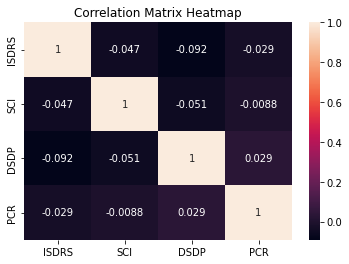

In [174]:
correlation_matrix = new_df2_2.corr()

# Create a heatmap
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [190]:
new_df2_2.columns

Index(['ISDRS', 'SCI', 'DSDP', 'PCR'], dtype='object')

In [199]:
new_df2_3 = df2_2[['track_pop','ISDRS', 'SCI', 'DSDP', 'PCR']]
new_df2_4 = new_df2_3.dropna()
new_df2_4 = new_df2_4.astype(int)

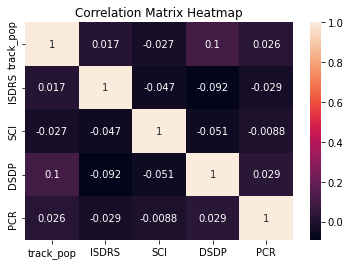

In [200]:
correlation_matrix = new_df2_4.corr()

# Create a heatmap
#plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#  For sheet 4 Culture

In [204]:
df3 = pd.read_excel("Book3.xlsx","Culture")

In [205]:
df3_1 = df3

In [206]:
df3_1.columns = ['CodMun', 'State', 'State code', 'Municipality', 'Pop',
               'track_pop','Region','Type_of_Publicoffice' ,"News_Paper", 'Magazine', 
               'AM_Radio', 'FM_Radio', 'Community_Radio', 'Community_TV',
               'TV_Genrator', 'Internet_Provider','Public_Libraries',
               'res_Municipal_Mgt']

In [207]:
df3_1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Yes,Yes,Yes,1
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Sector subordinated directly to the head of th...,Not,Yes,Yes,Yes,Yes,Not,Not,Yes,Yes,1
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Yes,Yes,Yes,Not,Not,Yes,Yes,1
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Indirect management body,Yes,Yes,Not,Yes,Yes,Not,Not,Yes,Yes,2
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Not,Yes,Yes,1


In [260]:
df3_2  = df3_1.replace(replace_dict)
df3_3  = df3_2.replace({"Yes" : 2, "Not" : 1, "Refusal" : None, "Did not inform" : None, '-' : None,
                       '(*) I was unable to inform' : None})

In [261]:
df3_3.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt'],
      dtype='object')

In [262]:
# last column is not a categorical value 


In [745]:
new_df3 = df3_3[['CodMun','Pop', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt']]

In [746]:
new_df3["Type_of_Publicoffice"].value_counts()

Secretariat in conjunction with other sectoral policies      4012
exclusive secretary                                           720
Sector subordinated to another secretariat                    338
Sector subordinated directly to the head of the Executive     273
Indirect management body                                      114
has no structure                                              109
Name: Type_of_Publicoffice, dtype: int64

In [747]:
new_df3_1 = new_df3.replace({'Secretariat in conjunction with other sectoral policies' : 1,
'exclusive secretary' : 2,
'Sector subordinated to another secretariat' : 3,
'Sector subordinated directly to the head of the Executive' : 4,
'Indirect management body' : 5,
'has no structure' : 6})

In [748]:
new_df3_2 = new_df3_1.dropna()

In [749]:
new_df3_2['News_Paper'].value_counts()

1.0    3001
2.0    1234
Name: News_Paper, dtype: int64

In [750]:
new_df3_2 = new_df3_2.astype(int)

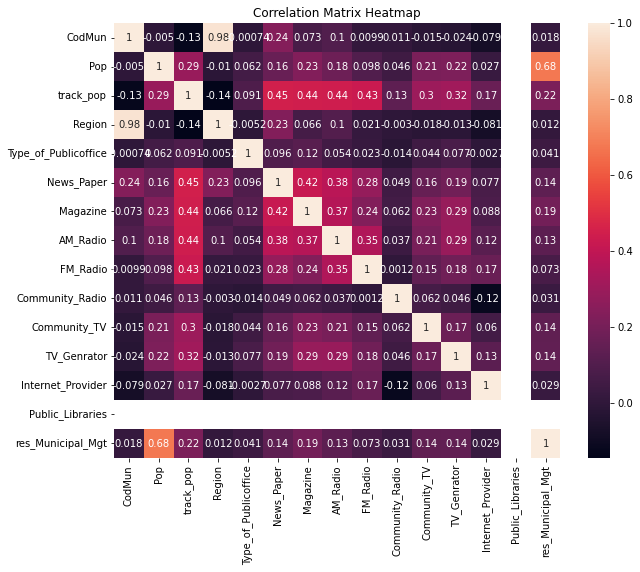

In [751]:
correlation_matrix = new_df3_2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# For sheet 4 health

In [272]:
df4 = pd.read_excel("Book3.xlsx","Health")

In [273]:
df4.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Msau141', 'msau142', 'Msau143', 'msau15', 'msau1511', 'msau1512',
       'msau1513', 'msau1514', 'msau1515', 'msau1516', 'msau1517', 'msau1518',
       'Msau1519', 'Msau18', 'Msau181', 'Msau19', 'Msau191', 'Msau20',
       'Msau201', 'Msau21', 'Msau28', 'Msau281', 'Msau411', 'Msau451',
       'Msau452', 'Msau453', 'Msau454', 'Msau455', 'Msau456'],
      dtype='object')

In [276]:
df4_1 = df4

In [278]:
df4_col = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
    "traning_periodically",'training_occasionally',"does_not_perform",
    "provides_infrastructure","PI_own_room","PI_Computer","PI_printer",
    "PI_Internet_Access",'PI_Own_Vehicle','PI_Telephone','PI_Daily','Own_budget_allocation',
    "PI_Transportation","Muncipal_Health_Conference",'Year_conference',
    'Regional_Management_collegiate',"meetings","Muncipal_Health_Plan",
    'Year_last_Plan','Health_Black','Health_Agent_Program','Number_commnuity_health_agents',
    'Programmes_Blacks','ES_muncipal_public_service','ES_another_Public_service',
    'ES_affiliated_private_service-SUS','T/R_publicservice_another_muncipality',
    'T/R_agreed_private-SUS',"NoES"]

In [279]:
df4_1.columns = df4_col

In [281]:
df4_1 = df4_1.replace(replace_dict)

In [282]:
df4_1.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Yes,Not,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
1,1100023,RO,11,Ariquemes,111148,6,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
2,1100031,RO,11,Cabixi,5067,2,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
3,1100049,RO,11,Cacoal,86416,5,1,Not,Yes,Not,...,Not,Yes,-,Not,Yes,Yes,Not,Not,Not,-
4,1100056,RO,11,Cerejeiras,16088,3,1,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-


In [403]:
df4_2 = df4_1.replace({"Yes" : 2, "Not" : 1, "Refusal" : None,
                       "Did not inform" : None, '-' : None,'Does not have a health management body' : 1})

In [404]:
df4_2['traning_periodically'].value_counts()

1.0    4917
2.0     585
Name: traning_periodically, dtype: int64

In [405]:
df4_2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,2.0,1.0,1.0,...,1.0,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN
1,1100023,RO,11,Ariquemes,111148,6,1,1.0,2.0,1.0,...,1.0,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN
2,1100031,RO,11,Cabixi,5067,2,1,1.0,2.0,1.0,...,1.0,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN
3,1100049,RO,11,Cacoal,86416,5,1,1.0,2.0,1.0,...,1.0,2.0,None,1.0,2.0,2.0,1.0,1.0,1.0,NaN
4,1100056,RO,11,Cerejeiras,16088,3,1,1.0,2.0,1.0,...,1.0,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN


In [406]:
df4_2["NoES"].value_counts()

2.0    212
Name: NoES, dtype: int64

In [407]:
df4_2.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES'],
      dtype='object')

In [408]:
new_df4 = df4_2[['track_pop', 'Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']]

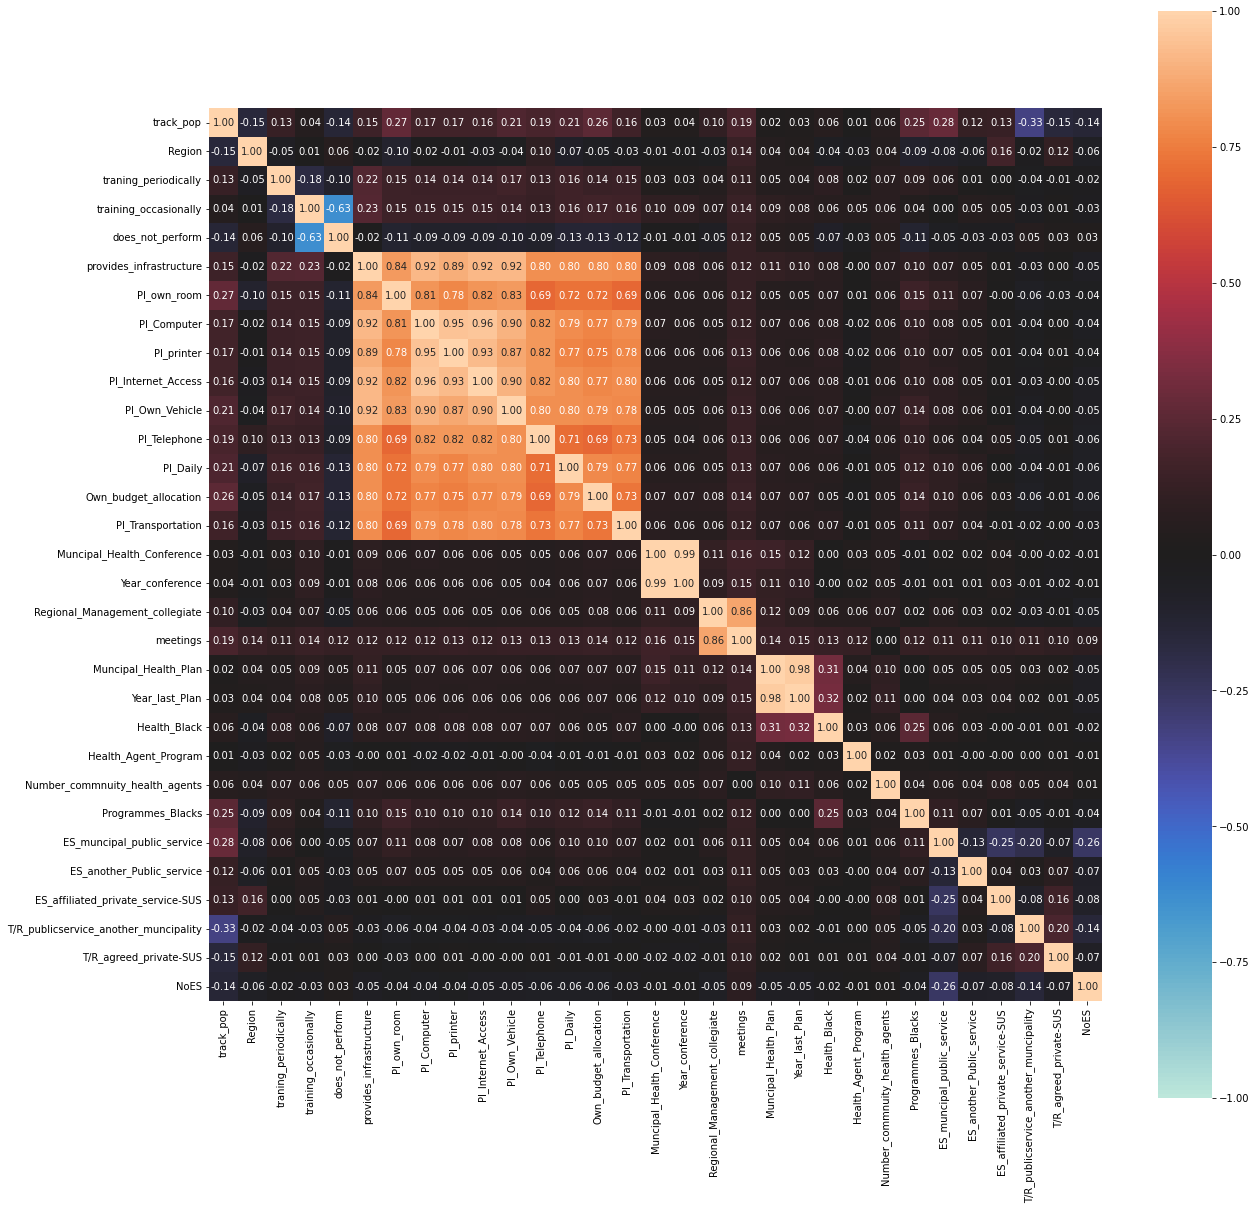

In [409]:
associations(new_df4,figsize = (20,20));

In [410]:
new_df4['traning_periodically'] = new_df4['traning_periodically'].astype('Int64')
new_df4['training_occasionally'] = new_df4["training_occasionally"].astype('Int64')
new_df4['does_not_perform'] = new_df4['does_not_perform'].astype('Int64')

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_2115/1285072972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df4['traning_periodically'] = new_df4['traning_periodically'].astype('Int64')
/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_2115/1285072972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df4['training_occasionally'] = new_df4["training_occasionally"].astype('Int64')
/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_2115/1285072972.py:3: SettingWith

In [411]:
new_df4['conduct_training'] = new_df4['traning_periodically'].apply(str)+ new_df4['training_occasionally'].apply(str)+ new_df4['does_not_perform'].apply(str)

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_2115/1256611620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df4['conduct_training'] = new_df4['traning_periodically'].apply(str)+ new_df4['training_occasionally'].apply(str)+ new_df4['does_not_perform'].apply(str)


In [412]:
new_df4.head()

,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,provides_infrastructure,PI_own_room,PI_Computer,PI_printer,PI_Internet_Access,...,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES,conduct_training
0,4,1,2,1,1,2.0,2.0,2.0,2.0,2.0,...,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN,211
1,6,1,1,2,1,2.0,2.0,2.0,2.0,2.0,...,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN,121
2,2,1,1,2,1,2.0,2.0,2.0,2.0,2.0,...,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN,121
3,5,1,1,2,1,2.0,2.0,2.0,2.0,2.0,...,2.0,None,1.0,2.0,2.0,1.0,1.0,1.0,NaN,121
4,3,1,1,2,1,2.0,2.0,2.0,2.0,2.0,...,2.0,None,NaN,2.0,1.0,1.0,1.0,1.0,NaN,121


In [413]:
new_df4['conduct_training'][new_df4['conduct_training'].isna()]

Series([], Name: conduct_training, dtype: object)

In [414]:
import pandas as pd

def convert_columns_to_int64(dataframe, columns):
    for column in columns:
        dataframe[column] = dataframe[column].astype('Int64')

# Usage example:
convert_columns_to_int64(new_df4, ['provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer', 'PI_Internet_Access', 'PI_Own_Vehicle', 
                                   'PI_Telephone', 'PI_Daily', 'Own_budget_allocation', 'PI_Transportation','Muncipal_Health_Conference'])


/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_2115/2194980681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column].astype('Int64')


In [415]:
col = ['track_pop', 'Region', 'traning_periodically', 'training_occasionally',
       'does_not_perform', 'provides_infrastructure', 'PI_own_room',
       'PI_Computer', 'PI_printer', 'PI_Internet_Access', 'PI_Own_Vehicle',
       'PI_Telephone', 'PI_Daily', 'Own_budget_allocation',
       'PI_Transportation', 'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']

In [416]:

def concatenate_columns(dataframe, new_column_name, columns_to_concat):
    dataframe[new_column_name] = dataframe[columns_to_concat].astype(str).apply(lambda x: ''.join(x), axis=1)


In [401]:
new_df4_1 = new_df4.fillna(-1)

In [402]:
concatenate_columns(new_df4_1, 'infrastructure_HC', ['provides_infrastructure', 'PI_own_room',
       'PI_Computer', 'PI_printer', 'PI_Internet_Access', 'PI_Own_Vehicle',
       'PI_Telephone', 'PI_Daily', 'Own_budget_allocation',
       'PI_Transportation', 'Muncipal_Health_Conference'])

In [426]:
df4_new = df4_1.replace({"Yes" : 1, "Not" : 0, "Refusal" : None,
                       "Did not inform" : None, '-' : -1 ,'Does not have a health management body' : 0,'(*) I was unable to inform':0})

In [427]:
df4_new.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,0.0,0.0,...,0.0,1.0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0
1,1100023,RO,11,Ariquemes,111148,6,1,0.0,1.0,0.0,...,0.0,1.0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0
2,1100031,RO,11,Cabixi,5067,2,1,0.0,1.0,0.0,...,0.0,1.0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0
3,1100049,RO,11,Cacoal,86416,5,1,0.0,1.0,0.0,...,0.0,1.0,-1,0.0,1.0,1.0,0.0,0.0,0.0,-1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,1.0,0.0,...,0.0,1.0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0


In [428]:
df4_new[df4_new.isna().any(axis=1)]

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
32,1100908,RO,11,Castanheiras,2923,1,1,0.0,0.0,1.0,...,1.0,1.0,-1,1.0,1.0,0.0,0.0,1.0,0.0,-1.0
146,1400456,RR,14,Pacaraima,20108,4,1,0.0,1.0,0.0,...,0.0,1.0,-1,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
245,1505700,SHOVEL,15,Ponta de Pedras,32007,4,1,1.0,0.0,0.0,...,NaN,1.0,-1,1.0,1.0,0.0,0.0,0.0,0.0,-1.0
247,1505908,SHOVEL,15,Porto de Moz,42456,4,1,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,1712504,TO,17,Marianópolis do Tocantins,5332,2,1,0.0,1.0,0.0,...,0.0,1.0,-1,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
444,1721109,TO,17,Tocantínia,7688,2,1,0.0,0.0,1.0,...,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
532,2104701,BAD,21,Graça Aranha,6261,2,2,1.0,0.0,0.0,...,0.0,1.0,-1,-1.0,0.0,0.0,0.0,0.0,0.0,1.0
1160,2407807,RN,24,Monte Alegre,22698,4,2,0.0,1.0,0.0,...,0.0,1.0,NaN,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0
1547,2607604,FOOT,26,Ilha de Itamaracá,27076,4,2,1.0,0.0,0.0,...,-1.0,1.0,-1,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0
1571,2609204,FOOT,26,Maraial,11098,3,2,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [429]:
df4_new_1 = df4_new.dropna()

In [430]:
df4_new_2  = df4_new_1[['track_pop', 'Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
        'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']]

In [431]:
df4_new_2.columns

Index(['track_pop', 'Region', 'traning_periodically', 'training_occasionally',
       'does_not_perform', 'provides_infrastructure', 'PI_own_room',
       'PI_Computer', 'PI_printer', 'PI_Internet_Access', 'PI_Own_Vehicle',
       'PI_Telephone', 'PI_Daily', 'Own_budget_allocation',
       'PI_Transportation', 'Muncipal_Health_Conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES'],
      dtype='object')

In [432]:
df4_new_2.astype(int)

,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,provides_infrastructure,PI_own_room,PI_Computer,PI_printer,PI_Internet_Access,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,4,1,1,0,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,-1
1,6,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,-1
2,2,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,-1
3,5,1,0,1,0,1,1,1,1,1,...,0,1,-1,0,1,1,0,0,0,-1
4,3,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,3,5,0,0,1,0,-1,-1,-1,-1,...,0,1,-1,-1,0,0,1,0,0,-1
5566,2,5,0,1,0,1,1,1,1,1,...,1,0,-1,-1,1,0,0,0,0,-1
5567,2,5,0,1,0,1,1,1,1,1,...,1,1,-1,1,1,0,0,1,0,-1
5568,2,5,0,1,0,0,-1,-1,-1,-1,...,0,1,-1,-1,0,0,0,1,0,-1


In [433]:
columns_with_value = df4_new_2.columns[df4_new_2.isin(['Does not have a health management body']).any()]

print(columns_with_value)

Index([], dtype='object')


In [434]:
df4_new_2['Regional_Management_collegiate'][df4_new_2['Regional_Management_collegiate']== 'Does not have a health management body']

Series([], Name: Regional_Management_collegiate, dtype: float64)

In [435]:
columns_with_value = df4_new_2.columns[df4_new_2.isin(['(*) I was unable to inform']).any()]

print(columns_with_value)

Index([], dtype='object')


In [436]:
df4_new_2['meetings'][df4_new_2['meetings'] == '(*) I was unable to inform']

Series([], Name: meetings, dtype: float64)

In [464]:
df4_new_3.head()

,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,provides_infrastructure,PI_own_room,PI_Computer,PI_printer,PI_Internet_Access,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,4,1,1,0,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,0
1,6,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,0
2,2,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,0
3,5,1,0,1,0,1,1,1,1,1,...,0,1,-1,0,1,1,0,0,0,0
4,3,1,0,1,0,1,1,1,1,1,...,0,1,-1,-1,1,0,0,0,0,0


In [439]:
df4_new_3 = df4_new_2.astype(int)

In [445]:
df4_new_3['PI_Own_Vehicle'].value_counts()

 0    4011
-1    1404
 1     133
Name: PI_Own_Vehicle, dtype: int64

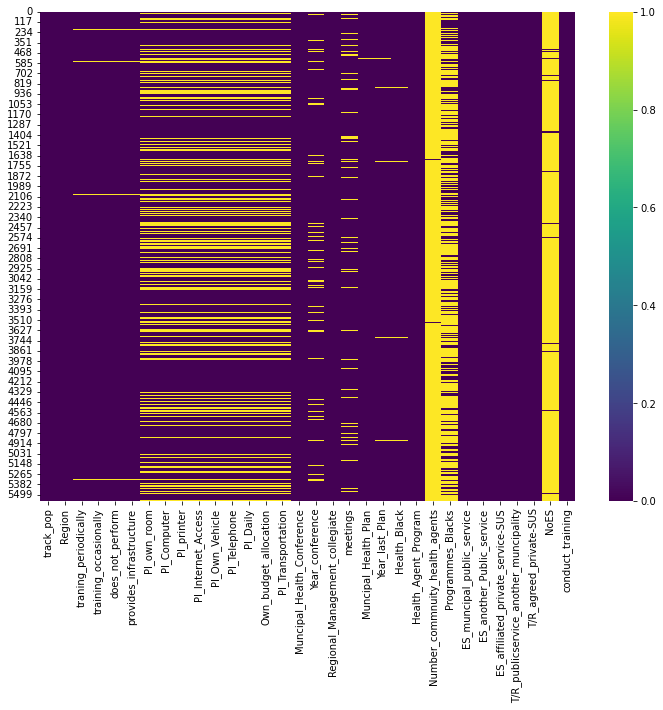

In [453]:
plt.figure(figsize=(12,9))
sns.heatmap(new_df4.isnull(), cmap='viridis')
plt.show()

In [454]:
df4_n = df4_1.replace({"Yes" : 1, "Not" : 0, "Refusal" : None,
                       "Did not inform" : None, '-' : None ,'Does not have a health management body' : 0,'(*) I was unable to inform':0})

In [455]:
len(df4_n)

5570

In [457]:
df4_n1 = df4_1.replace({"Yes" : 1, "Not" : 0, "Refusal" : None,
                       "Did not inform" : None, '-' : -1 ,
                       'Does not have a health management body' : 0
                       ,'(*) I was unable to inform':0})

In [463]:
df4_new_3['NoES'] = df4_new_3['NoES'].replace({-1:0})

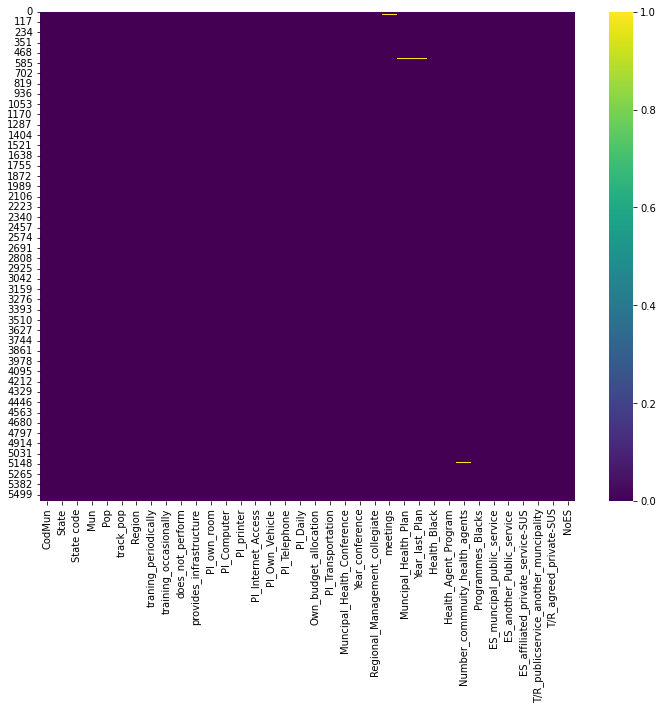

In [458]:
plt.figure(figsize=(12,9))
sns.heatmap(df4_n1.isnull(), cmap='viridis')
plt.show()

In [460]:
df4_n1['NoES'].value_counts()

-1.0    5355
 1.0     212
Name: NoES, dtype: int64

df) Are there convergences or disparities between the more general characteristics of communities and the organization and public policies?

df.race, gender, education

df1.urban legislation /n

df2) Do education policies coincide with the educational level of respondents in the communities?

df3) Do the means of information available in the municipality (local newspaper, local radio) coincide with those that communities use to find out about local issues?

df4)  are the existing health equipment in the municipality those mentioned by the interviewees for them to use (and qualility of them)?

In [294]:
survay_data.tail(10);
# we have to remove the tail none values - cleaning 

In [465]:
survay_data_1 = survay_data[:104]
# we are removing the null valued rows of the table at the end 

## df2) Do education policies coincide with the educational level of respondents in the communities?
    
    Here we are trying to find a relation between mayor education level and peoples education level from survay data.
No formal Schooling  - 0 - 1

A few years of elementary School - 1 - 2

Complete primary education - 2 - 3

A few years of high School - 3 - 4

Complete High School or equivalent - 4 - 5

Some years of higher education - 5 - 6

Complete Higher Education - 6,7,8,9 - 7

Elementary education (1st grade) incomplete" : 1,
"Complete Elementary School (1st Degree)": 2,
"Incomplete high school (2nd degree)" : 3,
"High school (2nd degree) complete" : 4,
"incomplete higher education" : 5,
"complete higher education" : 6,
"Master's degree" : 7,
 "Doctorate degree" : 8,
 "Specialization" : 9

In [467]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,Not,Not,Not


In [468]:
survay_data_1[["(4) Level of Education",
            "(4.1) Level of Education - Code"]].value_counts()

(4) Level of Education              (4.1) Level of Education - Code
Complete High School or equivalent  5.0                                39
A few years of elementary School    2.0                                29
Complete primary education          3.0                                13
Complete Higher Education           7.0                                10
No formal Schooling                 1.0                                 7
A few years of high School          4.0                                 3
Some years of higher education      6.0                                 3
dtype: int64

In [469]:
colms_dis = ['(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',
       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',
       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',
       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',
       '(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1',
       '(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1',
       '(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1',
       '(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1',
       '(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1',
       '(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1']

In [471]:
surv_disab_education = survay_data_1.iloc[:,2:34]
#disability data 

In [472]:
surv_disab_education[colms_dis] = surv_disab_education[colms_dis].astype(int)

In [480]:
surv_disab_education[colms_dis].head();

KeyError: "None of [Index(['(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',\n       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',\n       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',\n       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',\n       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',\n       '(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1',\n       '(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1',\n       '(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1',\n       '(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1',\n       '(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1',\n       '(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1',\n       '(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1'],\n      dtype='object')] are in the [columns]"

In [475]:
surv_disab_education['combined_disability'] = surv_disab_education[colms_dis].apply(lambda row: ''
                                                                        .join([str(row[col]) 
                                                                               for col in colms_dis])
                                                                        , axis=1)

In [476]:
surv_disab_education_1 = surv_disab_education

In [477]:
cl = ['inf_p','ld','mp','ha','ad','p','gl','bi','be','ep','sch','ma']

In [478]:
surv_disab_education_1.rename(columns=dict(zip(surv_disab_education_1.columns[16:28],
                                       cl)), inplace=True)

In [481]:
surv_disab_education_1.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,bi,be,ep,sch,ma,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000


In [485]:
col_codemun  = surv_disab_education_1["City Code"].unique()

In [486]:
col_codemun

array([3106200., 3154606., 3118601., 3144805., 3136603., 3105004.])

In [516]:
df_new.head(10)

,CodMun,State,State_code,Municipality,Estimated_pop_2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,40.0,1.0,9.0,1.0
1,1100023,RO,11,Ariquemes,111148,6,1,2.0,33.0,1.0,6.0,1.0
2,1100031,RO,11,Cabixi,5067,2,1,1.0,50.0,2.0,6.0,1.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,35.0,2.0,6.0,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,2.0,57.0,1.0,6.0,99.0
5,1100064,RO,11,Colorado do Oeste,15213,3,1,1.0,56.0,2.0,6.0,1.0
6,1100072,RO,11,Corumbiara,7052,2,1,1.0,36.0,1.0,6.0,99.0
7,1100080,RO,11,Costa Marques,19255,3,1,1.0,41.0,2.0,4.0,1.0
8,1100098,RO,11,Espigão DOeste,33009,4,1,1.0,55.0,2.0,9.0,2.0
9,1100106,RO,11,Guajará-Mirim,46930,4,1,2.0,28.0,1.0,6.0,99.0


In [515]:
df_mayor = df_new.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [517]:
df_mayor

,CodMun,State,State_code,Municipality,Estimated_pop_2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
2298,3105004,MG,31,Baldim,7780,2,3,1.0,39.0,2.0,6.0,1.0
2309,3106200,MG,31,Belo Horizonte,2530701,7,3,1.0,62.0,1.0,5.0,2.0
2448,3118601,MG,31,Contagem,673849,7,3,2.0,59.0,2.0,6.0,99.0
2661,3136603,MG,31,Nova União,5739,2,3,1.0,53.0,1.0,6.0,99.0
2763,3144805,MG,31,Nova Lima,97378,5,3,1.0,29.0,1.0,9.0,99.0
2880,3154606,MG,31,Ribeirão das Neves,341415,6,3,1.0,45.0,1.0,6.0,2.0


In [572]:
df_mayor_1  = df_mayor.replace({99:-1})

In [573]:
df_mayor_1.columns

Index(['CodMun', 'State', 'State_code', 'Municipality', 'Estimated_pop_2021',
       'track_pop', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [574]:
df_mayor_2 = df_mayor_1[['CodMun','track_pop','Municipality', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation']]

In [575]:
mncp = df_mayor_2["Municipality"]

In [576]:
df_mayor_2.index = mncp

In [577]:
df_mayor_3 = df_mayor_2[['track_pop', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation']]

In [578]:
T_df = df_mayor_3.T

In [579]:
T_df

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
track_pop,2.0,7.0,7.0,2.0,5.0,6.0
Region,3.0,3.0,3.0,3.0,3.0,3.0
Gender,1.0,1.0,2.0,1.0,1.0,1.0
Mayor_Age,39.0,62.0,59.0,53.0,29.0,45.0
Mayor_Ethnicity,2.0,1.0,2.0,1.0,1.0,1.0
Ed_of_Mayor,6.0,5.0,6.0,6.0,9.0,6.0
Projects_aimed_at_RuralEducation,1.0,2.0,-1.0,-1.0,-1.0,2.0


In [580]:
T_df.corr()

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
Municipality,,,,,,
Baldim,1.000000,0.993271,0.993865,0.999231,0.976509,0.994563
Belo Horizonte,0.993271,1.000000,0.997755,0.994753,0.967435,0.998939
Contagem,0.993865,0.997755,1.000000,0.996411,0.976253,0.997486
Nova União,0.999231,0.994753,0.996411,1.000000,0.976250,0.995242
Nova Lima,0.976509,0.967435,0.976253,0.976250,1.000000,0.976909
Ribeirão das Neves,0.994563,0.998939,0.997486,0.995242,0.976909,1.000000


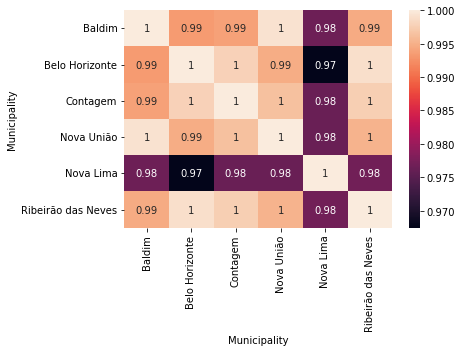

In [581]:
heatmap_df = sns.heatmap(T_df.corr(),annot = True)

In [616]:
T_df.to_csv("1qtdf")

In [617]:
df1_4.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact'],
      dtype='object')

In [618]:
df1_new = df1_4[['CodMun', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact']]

In [619]:
df1_new.head()

,CodMun,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,Alta Floresta DOeste,22516,4,1,1.0,1.0,1.0
1,1100023,Ariquemes,111148,6,1,3.0,3.0,3.0
2,1100031,Cabixi,5067,2,1,1.0,1.0,1.0
3,1100049,Cacoal,86416,5,1,2.0,1.0,2.0
4,1100056,Cerejeiras,16088,3,1,1.0,3.0,2.0


In [620]:
df1_leg = df1_new.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [621]:
df1_leg

,CodMun,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
2298,3105004,Baldim,7780,2,3,2.0,3.0,2.0
2309,3106200,Belo Horizonte,2530701,7,3,3.0,1.0,2.0
2448,3118601,Contagem,673849,7,3,1.0,1.0,1.0
2661,3136603,Nova União,5739,2,3,1.0,1.0,1.0
2763,3144805,Nova Lima,97378,5,3,3.0,3.0,3.0
2880,3154606,Ribeirão das Neves,341415,6,3,2.0,2.0,2.0


In [654]:
df1_leg_1 = df1_leg[['track_pop','Region',
                     'Concession_special_use_for_housing', 'Legitamate_Posession',
                     'Environmental_impact']]

In [655]:
df1_leg_1

,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
2298,2,3,2.0,3.0,2.0
2309,7,3,3.0,1.0,2.0
2448,7,3,1.0,1.0,1.0
2661,2,3,1.0,1.0,1.0
2763,5,3,3.0,3.0,3.0
2880,6,3,2.0,2.0,2.0


In [656]:
df1_leg_1.index = mncp

In [657]:
t_df1 = df1_leg_1.T

In [658]:
t_df1

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
track_pop,2.0,7.0,7.0,2.0,5.0,6.0
Region,3.0,3.0,3.0,3.0,3.0,3.0
Concession_special_use_for_housing,2.0,3.0,1.0,1.0,3.0,2.0
Legitamate_Posession,3.0,1.0,1.0,1.0,3.0,2.0
Environmental_impact,2.0,2.0,1.0,1.0,3.0,2.0


In [659]:
t_df1_corr = t_df1.corr()
t_df1_corr

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
Municipality,,,,,,
Baldim,1.000000,-0.480384,-0.210042,0.408248,-0.408248,-0.263523
Belo Horizonte,-0.480384,1.000000,0.941742,0.416747,0.931552,0.949443
Contagem,-0.210042,0.941742,1.000000,0.557370,0.943242,0.996317
Nova União,0.408248,0.416747,0.557370,1.000000,0.250000,0.484123
Nova Lima,-0.408248,0.931552,0.943242,0.250000,1.000000,0.968246
Ribeirão das Neves,-0.263523,0.949443,0.996317,0.484123,0.968246,1.000000


<Axes: xlabel='Municipality', ylabel='Municipality'>

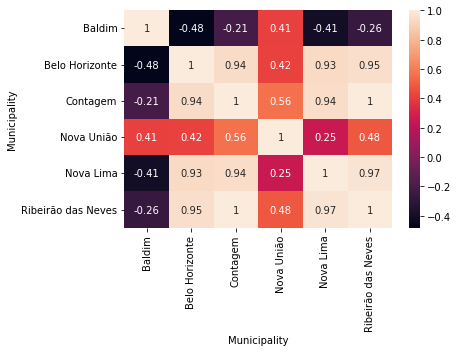

In [660]:
sns.heatmap(t_df1_corr,annot = True)

In [662]:
t_df1.to_csv("q2")

In [663]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,Not,Not,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Not,Not,Yes,Not
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,Not,Not,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Not,Not,Yes,Not
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,Not,Not,Not


In [668]:
df2_2.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,1.0,1.0,1.0
1,1100023,RO,11,Ariquemes,111148,6,1,1.0,1.0,2.0,1.0
2,1100031,RO,11,Cabixi,5067,2,1,1.0,1.0,1.0,2.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,1.0,2.0,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,1.0,1.0,1.0,1.0


In [671]:
df2_2.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'ISDRS', 'SCI', 'DSDP', 'PCR'],
      dtype='object')

In [672]:
df2_new = df2_2[['CodMun', 'Municipality', 'Pop', 'track_pop',
       'Region', 'ISDRS', 'SCI', 'DSDP', 'PCR']]

In [673]:
df2_edu = df2_new.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [674]:
df2_edu

,CodMun,Municipality,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
2298,3105004,Baldim,7780,2,3,1.0,1.0,1.0,1.0
2309,3106200,Belo Horizonte,2530701,7,3,1.0,1.0,1.0,1.0
2448,3118601,Contagem,673849,7,3,1.0,1.0,2.0,1.0
2661,3136603,Nova União,5739,2,3,2.0,1.0,1.0,1.0
2763,3144805,Nova Lima,97378,5,3,2.0,1.0,1.0,1.0
2880,3154606,Ribeirão das Neves,341415,6,3,2.0,1.0,2.0,2.0


In [689]:
df2_edu.index = mncp
df2_edu_1 = df2_edu[[ 'track_pop', 'ISDRS', 'SCI', 'DSDP', 'PCR']]
df2_edu_1 = df2_edu_1.astype(int)
t_df2 = df2_edu_1.T
t_df2_corr = t_df2.corr()

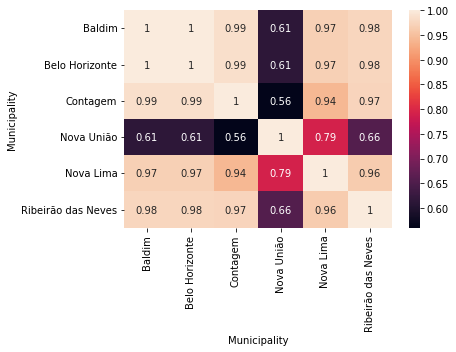

In [690]:
sns.heatmap(t_df2_corr,annot = True);

In [694]:
t_df2.to_csv('q3')

In [695]:
df3.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Yes,Yes,Yes,1
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Sector subordinated directly to the head of th...,Not,Yes,Yes,Yes,Yes,Not,Not,Yes,Yes,1
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Yes,Yes,Yes,Not,Not,Yes,Yes,1
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Indirect management body,Yes,Yes,Not,Yes,Yes,Not,Not,Yes,Yes,2
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Secretariat in conjunction with other sectoral...,Not,Not,Not,Yes,Yes,Not,Not,Yes,Yes,1


In [726]:
df3_3.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt'],
      dtype='object')

In [752]:
new_df3_2.head()

,CodMun,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,22516,4,1,1,1,1,1,2,2,1,2,2,2,1
1,1100023,111148,6,1,4,1,2,2,2,2,1,1,2,2,1
2,1100031,5067,2,1,1,1,1,2,2,2,1,1,2,2,1
3,1100049,86416,5,1,5,2,2,1,2,2,1,1,2,2,2
4,1100056,16088,3,1,1,1,1,1,2,2,1,1,2,2,1


In [753]:
new_df3_3 = new_df3_2[['CodMun', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt']]

In [759]:
new_df3_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4235 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CodMun                4235 non-null   int64
 1   track_pop             4235 non-null   int64
 2   Region                4235 non-null   int64
 3   Type_of_Publicoffice  4235 non-null   int64
 4   News_Paper            4235 non-null   int64
 5   Magazine              4235 non-null   int64
 6   AM_Radio              4235 non-null   int64
 7   FM_Radio              4235 non-null   int64
 8   Community_Radio       4235 non-null   int64
 9   Community_TV          4235 non-null   int64
 10  TV_Genrator           4235 non-null   int64
 11  Internet_Provider     4235 non-null   int64
 12  Public_Libraries      4235 non-null   int64
 13  res_Municipal_Mgt     4235 non-null   int64
dtypes: int64(14)
memory usage: 496.3 KB


In [768]:
df3_com = new_df3_3.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [770]:
df3_com

,CodMun,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
2298,3105004,2,3,1,1,1,1,1,1,1,1,2,2,1
2309,3106200,7,3,2,2,2,2,2,2,2,2,2,2,22
2448,3118601,7,3,1,2,1,1,1,2,2,1,1,2,2
2661,3136603,2,3,1,1,1,1,2,1,1,1,1,2,1
2763,3144805,5,3,1,2,1,1,2,1,2,1,1,2,1
2880,3154606,6,3,1,1,1,2,2,1,1,1,2,2,3


In [771]:
df3_com.index = mncp

In [772]:
df3_com_1 = df3_com [['track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt']]

In [773]:
df3_com_1 = df3_com_1.replace({'Secretariat in conjunction with other sectoral policies' : 1,
'exclusive secretary' : 2,
'Sector subordinated to another secretariat' : 3,
'Sector subordinated directly to the head of the Executive' : 4,
'Indirect management body' : 5,
'has no structure' : 6})

In [774]:
df3_com_2 = df3_com_1.dropna()
df3_com_3 = df3_com_2.astype(int)

In [775]:
t_df3 = df3_com_3.T
t_df3_corr = t_df3.corr()

<Axes: xlabel='Municipality', ylabel='Municipality'>

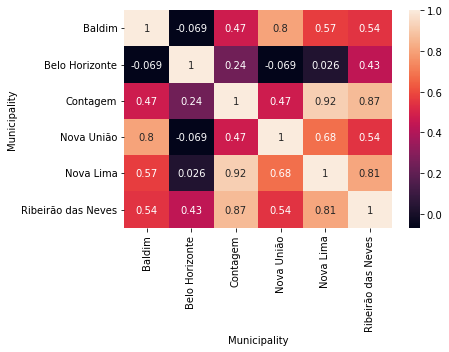

In [777]:
sns.heatmap(t_df3_corr,annot=True)

In [778]:
t_df3.to_csv('q4')

In [779]:
df4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Yes,Not,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Not,Yes,Not,...,Not,Yes,-,Not,Yes,Yes,Not,Not,Not,-
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Not,Not,-


In [782]:
df4_n.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,0.0,0.0,...,0.0,1.0,None,NaN,1.0,0.0,0.0,0.0,0.0,NaN
1,1100023,RO,11,Ariquemes,111148,6,1,0.0,1.0,0.0,...,0.0,1.0,None,NaN,1.0,0.0,0.0,0.0,0.0,NaN
2,1100031,RO,11,Cabixi,5067,2,1,0.0,1.0,0.0,...,0.0,1.0,None,NaN,1.0,0.0,0.0,0.0,0.0,NaN
3,1100049,RO,11,Cacoal,86416,5,1,0.0,1.0,0.0,...,0.0,1.0,None,0.0,1.0,1.0,0.0,0.0,0.0,NaN
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,1.0,0.0,...,0.0,1.0,None,NaN,1.0,0.0,0.0,0.0,0.0,NaN


In [784]:
df4_health = df4.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [785]:
df4_health

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
2298,3105004,MG,31,Baldim,7780,2 - 5001 to 10000,3 - Southeast,Not,Yes,Not,...,Yes,Yes,-,Yes,Yes,Not,Not,Not,Not,-
2309,3106200,MG,31,Belo Horizonte,2530701,7 - Greater than 500000,3 - Southeast,Not,Yes,Not,...,Not,Yes,-,Yes,Yes,Not,Not,Not,Not,-
2448,3118601,MG,31,Contagem,673849,7 - Greater than 500000,3 - Southeast,Not,Yes,Not,...,Not,Yes,-,Yes,Yes,Not,Not,Not,Not,-
2661,3136603,MG,31,Nova União,5739,2 - 5001 to 10000,3 - Southeast,Not,Yes,Not,...,Not,Yes,-,-,Yes,Not,Not,Yes,Not,-
2763,3144805,MG,31,Nova Lima,97378,5 - 50001 to 100000,3 - Southeast,Not,Yes,Not,...,Not,Yes,-,Not,Yes,Not,Not,Not,Not,-
2880,3154606,MG,31,Ribeirão das Neves,341415,6 - 100001 to 500000,3 - Southeast,Not,Yes,Not,...,Not,Yes,-,Not,Yes,Not,Not,Not,Not,-


In [789]:
df4_health = df4_health.replace(replace_dict)

In [791]:
df4_health_1 = df4_health.replace({"Yes" : 1, "Not" : 0, "Refusal" : None,
                       "Did not inform" : None, '-' : -1 })

In [798]:
df4_health_1.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES'],
      dtype='object')

In [815]:
df4_health_2 = df4_health_1[['track_pop','Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference',
       'Regional_Management_collegiate', 'Muncipal_Health_Plan',
        'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']]

In [816]:
df4_health_2.index = mncp

In [817]:
df4_health_2.T

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
track_pop,2,7,7,2,5,6
Region,3,3,3,3,3,3
traning_periodically,0,0,0,0,0,0
training_occasionally,1,1,1,1,1,1
does_not_perform,0,0,0,0,0,0
provides_infrastructure,1,1,1,1,1,1
PI_own_room,1,1,1,0,1,1
PI_Computer,1,1,1,0,1,1
PI_printer,1,1,1,0,1,1
PI_Internet_Access,1,1,1,0,1,1


In [818]:
t_df4 = df4_health_2.T
t_df4_corr = t_df4.corr()

<Axes: xlabel='Municipality', ylabel='Municipality'>

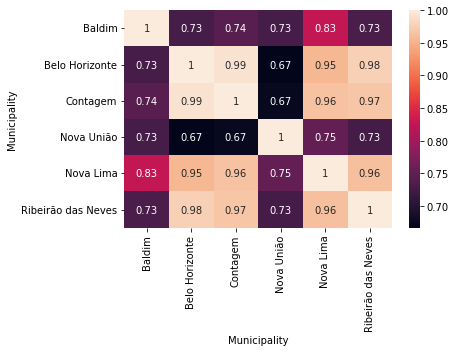

In [819]:
sns.heatmap(t_df4_corr,annot=True)

In [822]:
df4_health_with_meetings = df4_health_1[['track_pop','Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
        'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']]

In [823]:
df4_health_with_meetings.index = mncp

In [824]:
t_df4_m = df4_health_with_meetings.T
t_df4_m_corr = t_df4_m.corr()

<Axes: xlabel='Municipality', ylabel='Municipality'>

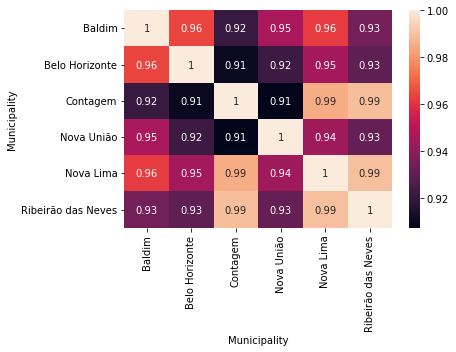

In [826]:
sns.heatmap(t_df4_m_corr,annot=True)

In [828]:
t_df4_m.to_csv("q5")